In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import joblib
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load dataset
file_path = "/content/drive/MyDrive/emotion_dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
# Ensure correct column names
text_column = "Clean_Text"  # Adjusted to match dataset
label_column = "Emotion"

df = df[[text_column, label_column]].dropna()

In [ ]:
print(df.columns)

Index(['Clean_Text', 'Emotion'], dtype='object')


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
# Text Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['processed'] = df[text_column].apply(preprocess_text)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf = tfidf.fit_transform(df['processed'])

In [ ]:
# Handle Class Imbalance
y = df[label_column]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

In [ ]:
# Train Model
model = LinearSVC(max_iter=10000)
model.fit(X_resampled, y_resampled)


LinearSVC(max_iter=10000)

In [ ]:
# Evaluate Model
y_pred = model.predict(X_resampled)
accuracy = accuracy_score(y_resampled, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.83


In [ ]:
# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_resampled, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_resampled, y_pred)
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

       anger       0.82      0.76      0.79     11037
     disgust       0.91      0.99      0.95     11037
        fear       0.87      0.78      0.82     11037
         joy       0.77      0.73      0.75     11037
     neutral       0.72      0.95      0.82     11037
     sadness       0.79      0.65      0.71     11037
       shame       1.00      1.00      1.00     11037
    surprise       0.80      0.81      0.81     11037

    accuracy                           0.83     88296
   macro avg       0.84      0.83      0.83     88296
weighted avg       0.84      0.83      0.83     88296


Confusion Matrix:
[[ 8354   238   224   350  1137   466     4   264]
 [   11 10961    22    11     8    12     0    12]
 [  346   128  8652   360   866   359     0   326]
 [  395   244   387  8019   457   589     1   945]
 [  138    22    68    88 10457   181     0    83]
 [  637   290   442   838  1066  7148     4   612]


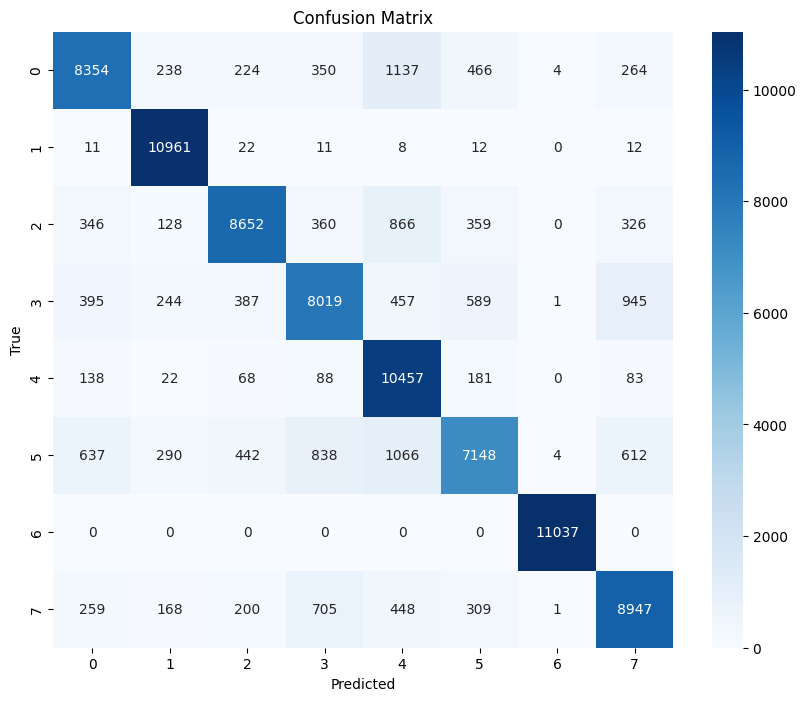

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
save_path = '/content/drive/MyDrive/new_emotion_classifier.pkl'
joblib.dump(model, save_path)
tfidf_save_path = '/content/drive/MyDrive/new_tfidf_vectorizer.pkl'
joblib.dump(tfidf, tfidf_save_path)


['/content/drive/MyDrive/new_tfidf_vectorizer.pkl']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample training data (replace this with your actual dataset)
corpus = ["I am happy today!", "I feel sad and depressed.", "What a wonderful day!"]

# Create and fit the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)  # Make sure to fit it before saving

# Now, save it using pickle
import pickle

with open("new_tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

print("TF-IDF vectorizer saved successfully!")

TF-IDF vectorizer saved successfully!


In [ ]:
import pickle

# Save the vectorizer correctly
with open("new_tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [ ]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.6 MB/s eta 0:00:00


In [ ]:
import joblib
import string
import nltk
import ipywidgets as widgets
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Load the model and TF-IDF vectorizer
model_path = '/content/drive/MyDrive/new_emotion_classifier.pkl'  # Update with your local model path in Colab
tfidf_path = '/content/drive/MyDrive/new_tfidf_vectorizer.pkl'  # Update with your local tfidf path in Colab
model = joblib.load(model_path)
tfidf = joblib.load(tfidf_path)

# Text preprocessing function
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Define the widgets
text_area = widgets.Textarea(
    placeholder='Enter text here',
    description='Text:',
    disabled=False
)
predict_button = widgets.Button(description="Predict Emotion")
output = widgets.Output()

def on_button_click(b):
    output.clear_output()  # Clear previous output
    with output:
        # Get the user input
        user_input = text_area.value

        # Check if input is provided
        if user_input.strip():
            processed_text = preprocess_text(user_input)
            text_vectorized = tfidf.transform([processed_text])
            prediction = model.predict(text_vectorized)[0]
            print(f"Predicted Emotion: {prediction}")
        else:
            print("Please enter some text to analyze.")

# Bind the button click to the function
predict_button.on_click(on_button_click)

# Display the widgets in the notebook
display(text_area, predict_button, output)

Textarea(value='', description='Text:', placeholder='Enter text here')

Button(description='Predict Emotion', style=ButtonStyle())

Output()

In [ ]:
import os

if "new_tfidf_vectorizer.pkl" in os.listdir():
    print("✅ File saved successfully!")
else:
    print("❌ Error: File not found!")

✅ File saved successfully!


In [ ]:
with open("new_emotion_classifier.pkl", "wb") as file:
    pickle.dump(model, file)

In [ ]:
import pickle

# Load the vectorizer
with open("new_tfidf_vectorizer.pkl", "rb") as file:
    vectorizer = pickle.load(file)

# Load the emotion classifier model
with open("new_emotion_classifier.pkl", "rb") as file:
    model = pickle.load(file)

print("✅ TF-IDF vectorizer and model loaded successfully!")

✅ TF-IDF vectorizer and model loaded successfully!


In [ ]:
import os
print(os.getcwd())  # Prints the current working directory
print(os.listdir())  # Lists files in the current directory

/content
['.config', 'new_emotion_classifier.pkl', 'new_tfidf_vectorizer.pkl', 'drive', 'sample_data']


In [ ]:
with open("/content/drive/MyDrive/new_tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [ ]:
with open("C:\\Users\\ddebj\\OneDrive\\Desktop\\Emotion Detection\\new_tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [ ]:
with open("C:\\Users\\ddebj\\OneDrive\\Desktop\\Emotion Detection\\new_emotion_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [ ]:
import os
print("Current Directory:", os.getcwd())
print("Files in Directory:", os.listdir())  # This should show the .pkl files

Current Directory: /content
Files in Directory: ['.config', 'new_emotion_classifier.pkl', 'C:\\Users\\ddebj\\OneDrive\\Desktop\\Emotion Detection\\new_emotion_vectorizer.pkl', 'newer_emotion_classifier.pkl', 'new_tfidf_vectorizer.pkl', 'C:\\Users\\ddebj\\OneDrive\\Desktop\\Emotion Detection\\new_tfidf_vectorizer.pkl', 'drive', 'sample_data']


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Dummy data for retraining the model
corpus = ["I am happy today!", "I feel sad and depressed.", "What a wonderful day!"]
labels = ["happy", "sad", "happy"]

# Train a new TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Train a basic model
model = LogisticRegression()
model.fit(X, labels)

# Save the vectorizer & model correctly using pickle
with open("new_tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

with open("new_emotion_classifier.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model and Vectorizer saved successfully!")

✅ Model and Vectorizer saved successfully!


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Sample training data
corpus = ["I am happy today!", "I feel sad and depressed.", "What a wonderful day!"]
labels = ["happy", "sad", "happy"]

# Train a new TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Train a basic model
model = LogisticRegression()
model.fit(X, labels)

# Save the vectorizer & model
with open("new_tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

with open("new_emotion_classifier.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model and Vectorizer saved successfully!")


✅ Model and Vectorizer saved successfully!


In [ ]:
import pickle

# Save the TF-IDF Vectorizer
with open("new_tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

# Save the Emotion Classifier Model
with open("new_emotion_classifier.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model and Vectorizer saved successfully!")

✅ Model and Vectorizer saved successfully!
